# Homework 0

###1.1 Just plane fun

Consider a hyperplane in n-dimensional Euclidean space, described by the $n+1$ real values $w_i$ for $i = 0, ..., n $ : the hyperplane consists of points $(x_1,...,x_n)$ satisfying

$$w_0 + w_1x_1 + ... w_nx_n = 0 $$

#### 1. Find a unit vector normal to the hyperplane.

A normal vector is described by $\mathbf{n}$

$$\mathbf{n} = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_n\end{bmatrix} $$


And to make it a unit vector we divide by the magnitude of n:

$$ \mathbf{u} = \frac{\mathbf{n}}{||\mathbf{n}||} $$

Where $||\mathbf{n}||$ is the Euclidean magnitude of the vector $\mathbf{n}$.

If given a point $(v_1, ..., v_n)$ on the hyperplane, give the equation for the line through the point that is orthogonal to the hyperplane.

A parameterization of this line:

$$\mathbf{r}(t) = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n\end{bmatrix} + \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_n\end{bmatrix} t $$

#### 2.Given a point $(v_1, ..., v_n)$, how can you determine which side of the hyperplane it is on?

Plug into $$w_0 + w_1x_1 + ... w_nx_n $$ and see whether $>$ or $<$ 0.

#### 3. What is the distance of a point 



###1.2 Multivariate Gaussian

#### 1. Write the pdf for a multivariate gaussian

Here it is:

$$p_X(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^k|\mathbf{\Sigma}|}} \exp \big( - \frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu})\big) $$

#### 2. Let Y = 2X.  What is the pdf of Y?

It is:

$$p_X(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^k|4\mathbf{\Sigma}|}} \exp \big( - \frac{1}{2}(\mathbf{x} - 2\mathbf{\mu})^T  (4\mathbf{\Sigma})^{-1}(\mathbf{x} - 2\mathbf{\mu})\big) $$

## Programming problems

### 2.1 Regularization

Given an $n \times n$ matrix $C$, add a scalar $a$ to each diagonal entry of $C$.

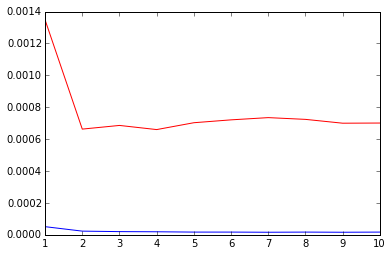

In [212]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline


n = 100
origC = np.random.randn(n,n)

a = 2

import time
numiter = 10
timevecIJ = np.zeros((numiter,1))
plotvec = np.linspace(1,10,10)

for itr in range(numiter):
    C = origC
    start = time.clock()
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            if i == j:
                C[i,j] = C[i,j] + a

    end = time.clock()
    timevecIJ[itr] = end - start
    
timevecADD = np.zeros((numiter,1))   

for itr in range(numiter):
    C = origC
    start = time.clock()
       
    C = C + np.diag(np.ones(n)*a)
    
    end = time.clock()
    timevecADD[itr] = end - start


plt.figure(1)    
plt.plot(plotvec,timevecIJ,color='red')
plt.plot(plotvec,timevecADD,color='blue')
plt.show()



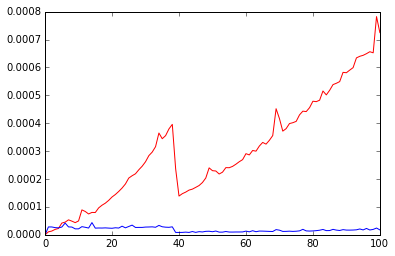

In [213]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

import time
N = 100
a = 2
plottimevec = np.linspace(0,N,N+1)
IJtime = np.zeros((N+1,1))
ADDtime = np.zeros((N+1,1))

for n in range(1,N+1):

    origC = np.random.randn(n,n)

    numiter = 10
    timevecIJ = np.zeros((numiter,1))

    for itr in range(numiter):
        C = origC
        start = time.clock()

        for i in range(C.shape[0]):
            for j in range(C.shape[1]):
                if i == j:
                    C[i,j] = C[i,j] + a

        end = time.clock()
        timevecIJ[itr] = end - start
        
    IJtime[n] = np.mean(timevecIJ)    

    timevecADD = np.zeros((numiter,1))   

    for itr in range(numiter):
        C = origC
        start = time.clock()

        C = C + np.diag(np.ones(n)*a)

        end = time.clock()
        timevecADD[itr] = end - start
    
    ADDtime[n] = np.mean(timevecADD) 


plt.figure(1)    
plt.plot(plottimevec,IJtime,color='red')
plt.plot(plottimevec,ADDtime,color='blue')
plt.show()



## 2.2 Largest Off-diagonal Element

Given an $n \times n$ matrix $A$, find the largest off-diagonal element.

In [214]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

n = 5
A = np.random.randn(n,n)
print A

newmax = 0
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if i != j:
            if A[i,j] > newmax:
                newmax = A[i,j]
print newmax


[[-0.96774441  0.98244955 -1.20488702  0.04311135 -0.52337463]
 [ 1.70830879 -1.9704082  -2.57037043  1.2424986  -0.63497944]
 [-0.10433221  0.23220285  1.04331035  0.46918597 -0.04524707]
 [ 0.37823184  0.33062756 -0.46278396 -0.59516563  1.5406353 ]
 [-1.09673647  0.57627366  0.65902934 -1.78703373  1.64560901]]
1.70830878963


In [215]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

n = 5
A = np.random.randn(n,n)
print A

np.fill_diagonal(A,0)
newmax = np.amax(A)

print newmax

[[ 0.33797246  1.67318903 -0.44937167 -0.35009047  0.8570302 ]
 [-0.28861831  0.34026528  0.25760404  0.95029192 -0.12299936]
 [-0.13673444  0.92602699 -0.83798191  1.88640595 -0.10642227]
 [ 0.65213624 -0.10255924  1.53586351 -0.19448742  1.0438691 ]
 [-0.27620733  0.90956515 -1.11772767 -1.03862358 -0.17043015]]
1.88640595413


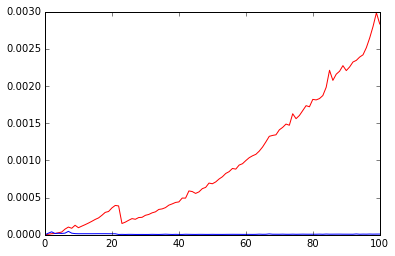

In [216]:
import time
N = 100
plottimevec = np.linspace(0,N,N+1)
IJtime = np.zeros((N+1,1))
FINDtime = np.zeros((N+1,1))

for n in range(1,N+1):

    origA = np.random.randn(n,n)

    numiter = 10
    timevecIJ = np.zeros((numiter,1))

    for itr in range(numiter):
        newmax = 0
        A = origA
        start = time.clock()

        for i in range(A.shape[0]):
            for j in range(A.shape[1]):
                if i != j:
                    if A[i,j] > newmax:
                        newmax = A[i,j]

        end = time.clock()
        timevecIJ[itr] = end - start
        
    IJtime[n] = np.mean(timevecIJ)    

    timevecFIND = np.zeros((numiter,1))   

    for itr in range(numiter):
        A = origA
        start = time.clock()

        np.fill_diagonal(A,0)
        newmax = np.amax(A)

        end = time.clock()
        timevecFIND[itr] = end - start
    
    FINDtime[n] = np.mean(timevecFIND) 


plt.figure(1)    
plt.plot(plottimevec,IJtime,color='red')
plt.plot(plottimevec,FINDtime,color='blue')
plt.show()


## 2.3 Pairwise Computation

Given a vector $x$ of length $m$, and vector $y$ of length $n$, compute $m \times n$ matrixes: $A$ and $B$, such that $A(i,j) = x(i) + y(j)$, and $B(i,j) = x(i) \cdot y(j)$.

In [217]:
m = 5

x = np.random.randn(m,1)
print x

n = 3

y = np.random.randn(n,1)
print y

A = np.zeros((m,n))
A[:,:] = x
A[:,:] = A[:,:] + y.T
print A


[[-0.32106144]
 [ 0.80679249]
 [ 0.21402959]
 [-0.78451276]
 [-0.8519078 ]]
[[ 0.25951119]
 [-0.25107845]
 [ 0.17022641]]
[[-0.06155024 -0.57213989 -0.15083503]
 [ 1.06630368  0.55571404  0.9770189 ]
 [ 0.47354078 -0.03704886  0.384256  ]
 [-0.52500156 -1.03559121 -0.61428635]
 [-0.59239661 -1.10298626 -0.68168139]]


In [218]:
B = np.zeros((m,n))

B[:,:] = x
B[:,:] = B[:,:] * y.T
print B

[[-0.08331904  0.08061161 -0.05465314]
 [ 0.20937168 -0.20256821  0.13733739]
 [ 0.05554307 -0.05373822  0.03643349]
 [-0.20358984  0.19697425 -0.13354479]
 [-0.22107961  0.21389569 -0.14501721]]


## 2.4 Pairwise Euclidean Distances

Given a $d \times m$ matrix $X$, and a $d \times n$ matrix $Y$, compute an $m \times n$ matrix $D$, such that $D(i,j) = ||x^i - y^j||^2$ where $x^i$ is the $i$-th column of $X$, and $y^j$ is the $j$-th column of $Y$.



In [222]:
import scipy.spatial

m = 5;
n = 4;
d = 3;

x = np.random.randn(d,m)
y = np.random.randn(d,n)

D = np.random.randn(m,n)

for i in range(m):
    for j in range(n):
        D[i,j] = np.linalg.norm(x[:,i] - y[:,j])
        
print D

print scipy.spatial.distance.pdist(D)

[[ 2.51892344  4.27122053  2.64049556  1.7562046 ]
 [ 1.2010423   2.88589132  2.28147446  3.15716253]
 [ 3.03492476  3.02329627  2.21956378  3.02842691]
 [ 4.65182066  2.14407692  4.36024249  3.70816408]
 [ 1.73587514  3.47910057  1.78719238  1.98858832]]
[ 2.39740005  1.90244724  3.98015902  1.42223317  1.84456249  4.13316333
  1.49927443  2.90377806  1.77862216  4.45674254]


## 2.5 Compute Mahalanobis Distances

Given a center vector $c$, a covariance matrix $S$, and a set of $n$ vectors as columns in matrix $X$, compute the distances of each column in $X$ to $c$, using the following formula:

$$ D(i) = (x^i - c)^T S^{-1}(x^i - c) $$

Here, $D$ is a row vector of length $n$.

In [223]:
# X is a matrix with n vectors as columns

# so X is m x n matrix

# center vector c also should have m elements

# x^i is a column of x, and need to be able to do subtraction with c, 
# so they have same amount of elemetns

m = 7
n = 3

c = np.random.randn(m,1)

X = np.random.randn(m,n)

# D is a row vector of length n, that means it is 1 x n

i = 0
D = np.zeros((1,n))[0]
S = np.random.randn(m,m)
S = np.matrix(S)

for i in range(len(D)):
    D[i] = np.matrix(X[:,i] - c[:,0]) * S.I * np.matrix(X[:,i] - c[:,0]).T
    
print D


[  2.58491354   9.66056503  14.93536456]


## 2.6 2-D Gaussian

Generate 1000 random points from a 2-D Gaussian distribution with mean $\mu$ = $[4,2]$ and covariance

$$\Sigma = \begin{bmatrix} 1 & 1.5\\ 1.5 & 3 \end{bmatrix} $$

Plot the points so obtained, and estimate their mean and covariance from the data.  Find the eigenvectors of the covariance matrix and plot them centered at the sample mean.



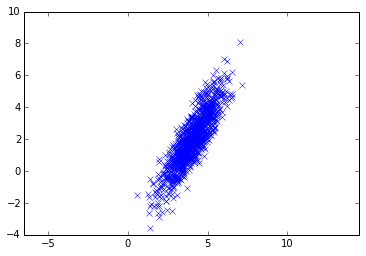

(1000,)
(1000,)


In [237]:
mean = [4,2]
cov = [[1,1.5],[1.5,3]]

import matplotlib.pyplot as plt
x,y = np.random.multivariate_normal(mean,cov,1000).T
plt.plot(x,y,'x'); plt.axis('equal'); plt.show()

print x.shape
print y.shape


In [242]:
print np.mean(x)
print np.mean(y)

X = np.vstack((x,y))
print np.cov(X)

4.03363076277
2.00432507705
[[ 0.97284694  1.45041388]
 [ 1.45041388  2.87208671]]
